In [1]:
from numpy import *

In [390]:
import matplotlib.pyplot as plt

In [313]:
MAX_ITERATION = 10000000

In [759]:
# Calculate the value on the grid at point (x,y)
def spiral_cell(x,y):
    m = max(abs(x),abs(y)) # square that point belongs to
    p = (2*m+1)*(2*m+1) # right-bottom point of square

    # return the point by retracing from the right-bottom point
    if x == m:
        # right side
        return p - (m + y)
    if y == m:
        # top side
        return p - 2*m - (m - x)  
    if x == -m:
        # left side
        return p - 4*m - (m - y)
    if y == -m:
        # bottom side
        return p - 6*m - (m + x)

In [758]:
# Returns a full spiral (only used for illustration)
def spiral(size):
    m = zeros((size*2+1, size*2+1))
    x = 0
    for xv in range(-size,size+1):
        y = 0
        for yv in range(size,-size-1,-1):
            m[y][x] = spiral_cell(xv,yv)
            y += 1
        x += 1
    return m

In [855]:
# Helper function: normalizes a matrix so the rank of 
# its values remains.
# This will be used to aid color maps.
def discrete_normalize(m):
    m = m.copy()
    size = m.shape[0]
    values = []
    for x in range(0,size):
        for y in range(0,size):
            values.append(m[y,x])
    values.sort()
    for x in range(0,size):
        for y in range(0,size):
            m[y,x] = values.index(m[y,x])
    
    return m

In [ ]:
#Proof the spiral is correct. This code is scrappy and you need to parametrize it a little
def draw_spiral(size, path):
    _, ax = plt.subplots(figsize=(20,20))
    m = spiral(size)
    min_val, max_val = 0, size * 2 + 1
    ax.set_yticks(arange(size*2+1)+0.5)
    ax.set_xticks(arange(size*2+1)+0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    

    if path == None:
        for x in range(size * 2 + 1):
            for y in range(size*2 + 1):
                c = int(m[x][y])
                ax.text(y, x, str(c), va='center', ha='center', fontsize=18, color = 'w', weight='bold')
        ax.imshow(m%2, cmap=plt.get_cmap('cividis'))
        ax.axis('off')

        #ax.grid(True, which='both',color='k')
    else:
        ax.imshow(m, cmap=plt.get_cmap('Greys'), alpha=0.1)
        ax.grid(True, which='both',color='k')
        ax.axis('off')
        
    plt.figure(figsize=(20,20))
    
    if path:
        arrow_cmap = plt.get_cmap('cividis')
        last_x = None
        last_y = None

        norm = plt.Normalize(0, len(path))

        i = 0
        
        for point,value in path:
            x = point[0]
            y = point[1]

            if last_x is not None:
                ax.arrow(last_x + size, 
                         size - last_y, 
                          (x - last_x),
                          (last_y - y), width = 0.2, head_width=0.5, head_length=0.5, 
                         fc=arrow_cmap(norm(i)), ec=arrow_cmap(norm(i)))
            last_x = x
            last_y = y
            i += 1
            
        oc = plt.Circle((size, size), 0.5, color='b')
        lc = plt.Circle((last_x + size, size - last_y), 0.5, color='r')
        ax.add_artist(oc)
        ax.add_artist(lc)

plt.show()
_,path = walk((1,2),start=(0,0))
draw_spiral(30,path)

In [1219]:
len(path)


1885

In [1016]:
# Move a knight d from the point o according to the rules.
# Optionally gets a list of already visited positions.
def move(o,k,visited=None):
    x,y = o
    dx,dy = k
    minimal = None
    for kx,ky in [(dx,dy),(dy,dx)]:
        for horizontal in [-1,+1]:
            for vertical in [-1,+1]:
                pdx = horizontal*kx
                pdy = vertical*ky
                candidate = {"to":(x+pdx,y+pdy),"value":spiral_cell(x+pdx,y+pdy)}
                
                is_new = (visited is None or candidate["value"] not in visited)
                is_minimal = (minimal is None or minimal["value"] > candidate["value"])
                if is_new and is_minimal:
                    minimal = candidate
    return minimal

In [1017]:
move((0,0),(1,2))

{'to': (1, -2), 'value': 10}

In [977]:
# Simulate the walk of a knight from any starting point
def walk(knight, start=(0,0)):
    visited = {}
    
    last_position = start
    last_value = spiral_cell(start[0],start[1])
    visited[last_value] = True # consider start as visited
    path = [(last_position, last_value)]

    i = 0
    
    # ignore bishop/rooks, we know they don't get trapped
    if (knight[0] == knight[1] or knight[0] == 0 or knight[1] == 0):
        return None
    
    
    while True:
        candidate = move(last_position, knight, visited)
        
        if candidate == None:
            break 
            
        last_position = candidate["to"]
        last_value = candidate["value"]
        
        visited[last_value] = True
        path.append((last_position,last_value))
        
        i += 1        
        if i > MAX_ITERATION:
            return None

    return i,path

In [1149]:
# As per Neil Sloane's video
iterations,path = walk((21,44),(0,0))
path[-1],iterations

(((54, -132), 69247), 72520)

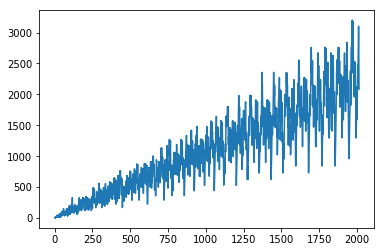

In [841]:
plt.plot(path)

In [845]:
# Build a grid that shows all walks of all possible knight configurations
def all_walks(n):
    m = zeros((2*n+1,2*n+1))
    values = []
    
    # build the walks
    for x in range(0,n+1):
        for y in range(0,x):
            result = walk((x,y))
            if result:
                iterations,_ = result
                m[n + y, n + x] = iterations
                values.append(iterations)
    
    # This problem is symmetrical so add the symmetries
    symmetries = m+rot90(m)+rot90(m,k=2)+rot90(m,k=3)+fliplr(m)+flipud(m)+fliplr(rot90(m))+flipud(rot90(m))
                       
    return symmetries

In [928]:
# Bishop/rook knights behave as "infinite" walks
def post_process(grid):
    return where(grid==0,grid.max(),grid)

In [848]:
walks80 = all_walks(80)

In [1120]:
walks80[86,85]

1795.0

In [936]:
dwalks80 = discrete_normalize(walks80)

In [1156]:
#scrap code to get winners/losers
from fractions import Fraction
import operator
fractions = []
d = {}
for x,y in argwhere(post_process(dwalks80) < 3000):
    x = x - 80
    y = y - 80
    if min(abs(x),abs(y)) == 0:
        continue
    f = Fraction(max(abs(x),abs(y)),min(abs(x),abs(y)))
    if f not in fractions:
        fractions.append(f)
        d[(f.numerator,f.denominator)] = walks80[x+80,y+80]
print(sorted(d.items(), key=operator.itemgetter(1)))

[((5, 3), 1322.0), ((6, 5), 1795.0), ((7, 5), 1810.0), ((4, 3), 1887.0), ((2, 1), 2015.0), ((8, 5), 2757.0), ((7, 6), 3486.0), ((11, 9), 3625.0), ((3, 1), 3722.0), ((8, 7), 3983.0), ((5, 4), 4285.0), ((13, 9), 4393.0), ((9, 7), 4504.0), ((3, 2), 4633.0), ((7, 3), 4682.0), ((19, 17), 5282.0), ((11, 7), 5319.0), ((10, 9), 5678.0), ((15, 7), 5707.0), ((11, 10), 5960.0), ((8, 3), 5973.0), ((11, 8), 6129.0), ((15, 11), 6262.0), ((13, 11), 6312.0), ((11, 4), 6354.0)]


In [850]:
backup = walks80.copy()

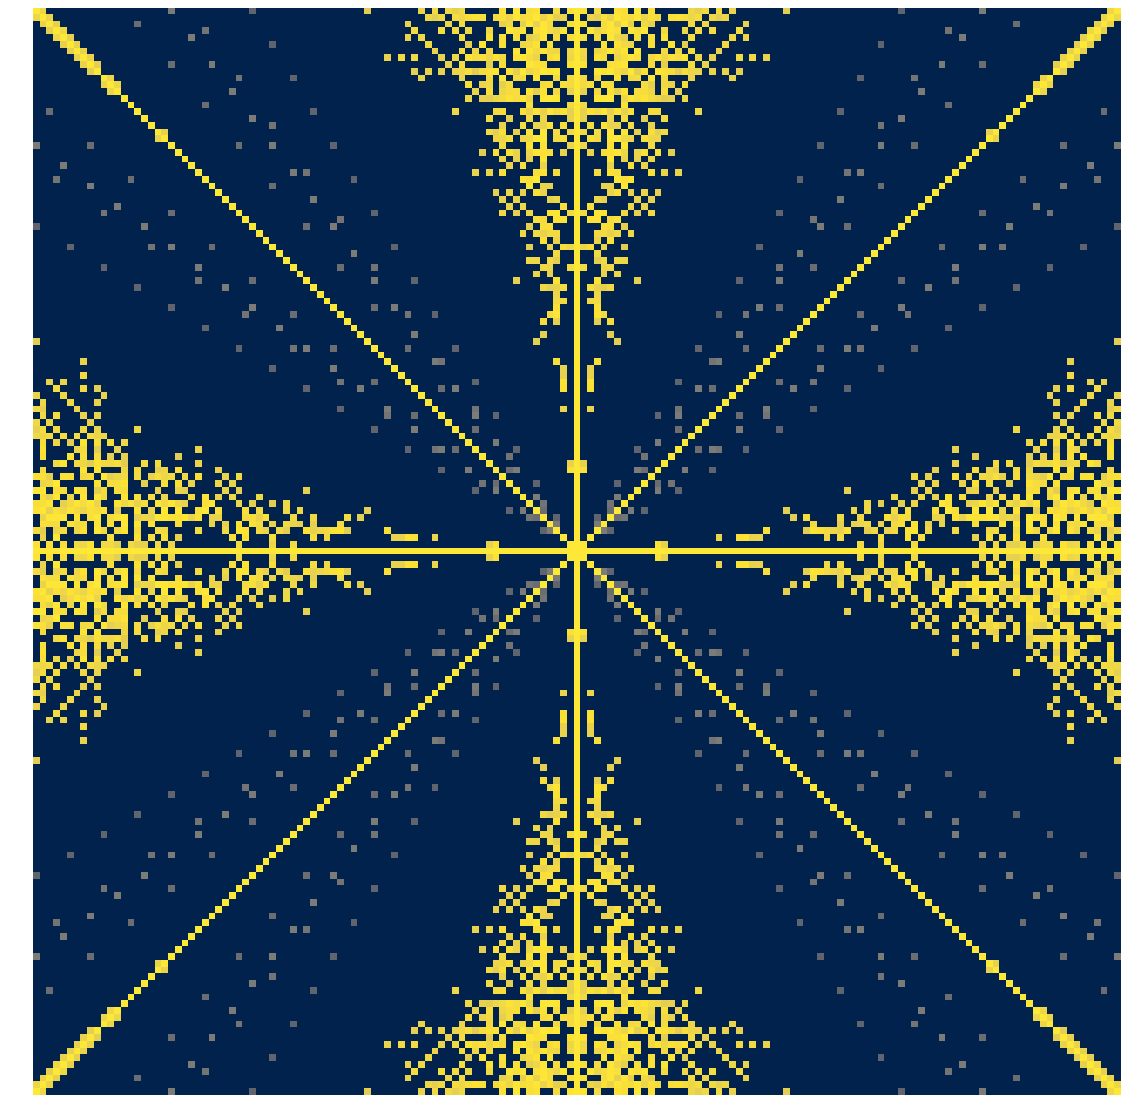

In [1076]:
plt.figure(figsize=(20,20))
plt.axis('off')
p = post_process(dwalks80)
plt.imshow(where(p <= p.min()*1.5,p.min()*5.1+p*10, where(p >= p.max() * 0.9, p, 0)), cmap=plt.get_cmap('cividis'))


In [500]:
def fill(n):
    m = {}

    for x in range(12,13):
        for y in range(1,8):
            result = walk((x*y+1,y))
            if result:
                position,iterations = result
                m[(x*y+1)/y] = iterations
    
    return m

In [501]:
m = fill(12)

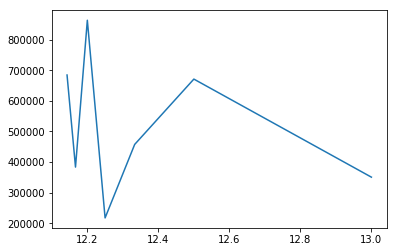

In [502]:
x = []
y = []
for key in sorted(m.keys()):
    x.append(key)
    y.append(m[key])
    
plt.plot(x,y)

In [482]:
m.keys()

dict_keys([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0])

In [1175]:
# Heat map of point starts
def heat_map_starting(knight,size):
    m = zeros((size*2+1, size*2+1))
    x = 0
    for xv in range(-size,size+1):
        y = 0
        for yv in range(size,-size-1,-1):
            iterations,path = walk(knight,(xv,yv))
            m[y][x] = iterations
            y += 1
        x += 1
    return m

In [1176]:
h12 = heat_map_starting((1,2),80)

KeyboardInterrupt: 

In [1215]:
argwhere(h12<=h12.min()*1.4)

array([[ 79,  84],
       [ 80,  86],
       [ 81,  88],
       ...,
       [160, 152],
       [160, 154],
       [160, 159]])

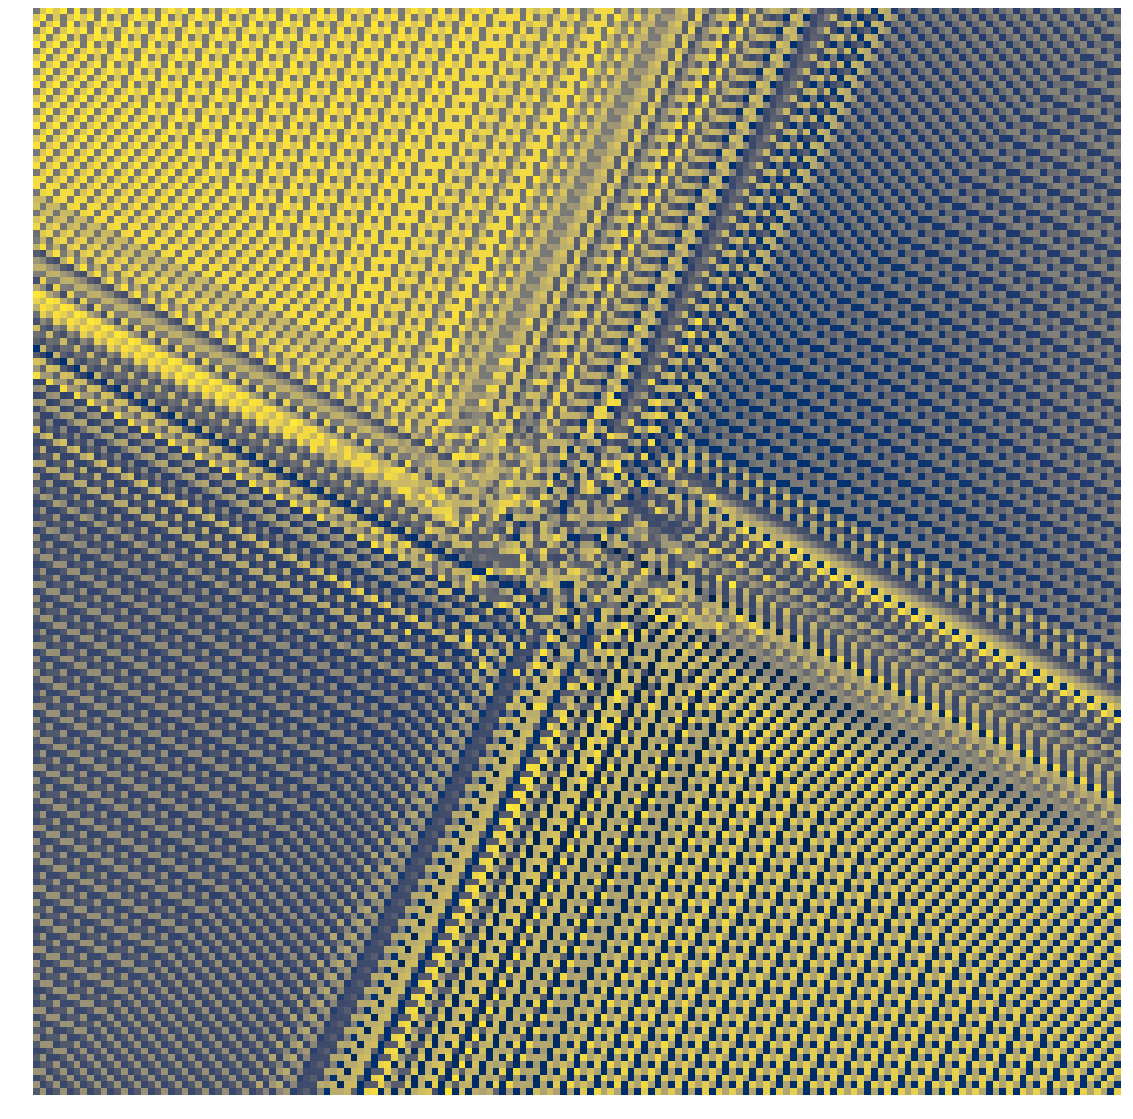

In [1162]:
d = discrete_normalize(h12)
plt.figure(figsize=(20,20))
plt.axis('off')

plt.imshow(d,cmap=plt.get_cmap('cividis'))

In [1203]:
_,path = walk((1,2),start=(4,1))
len(path)

263

In [1237]:
# Finds the fastest knight + start combo (actually just lists all the outcomes)
def fastest_start(knights,size):
    k = {}
    
    for knight in knights:
        if knight[0] == knight[1]:
            continue
        m = zeros((size*2+1, size*2+1))
        x = 0
        for xv in range(-size,size+1):
            y = 0
            for yv in range(size,-size-1,-1):
                iterations,path = walk(knight,(xv,yv))
                m[y][x] = iterations
                y += 1
            x += 1
        k[knight] = m.min(),argwhere(m==m.min())
    return k

In [1239]:
k = fastest_start([(x,y) for x in range(3,6) for y in range (3,6)], 8)
print(k)

{(3, 4): (474.0, array([[ 3, 11]])), (3, 5): (439.0, array([[ 4, 15]])), (4, 3): (474.0, array([[ 3, 11]])), (4, 5): (732.0, array([[2, 4],
       [5, 1]])), (5, 3): (439.0, array([[ 4, 15]])), (5, 4): (732.0, array([[2, 4],
       [5, 1]]))}


In [1228]:
[(x,y) for x in range(1,5) for y in range (1,5)]

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)]

In [1240]:
spiral_cell(4,1)

76

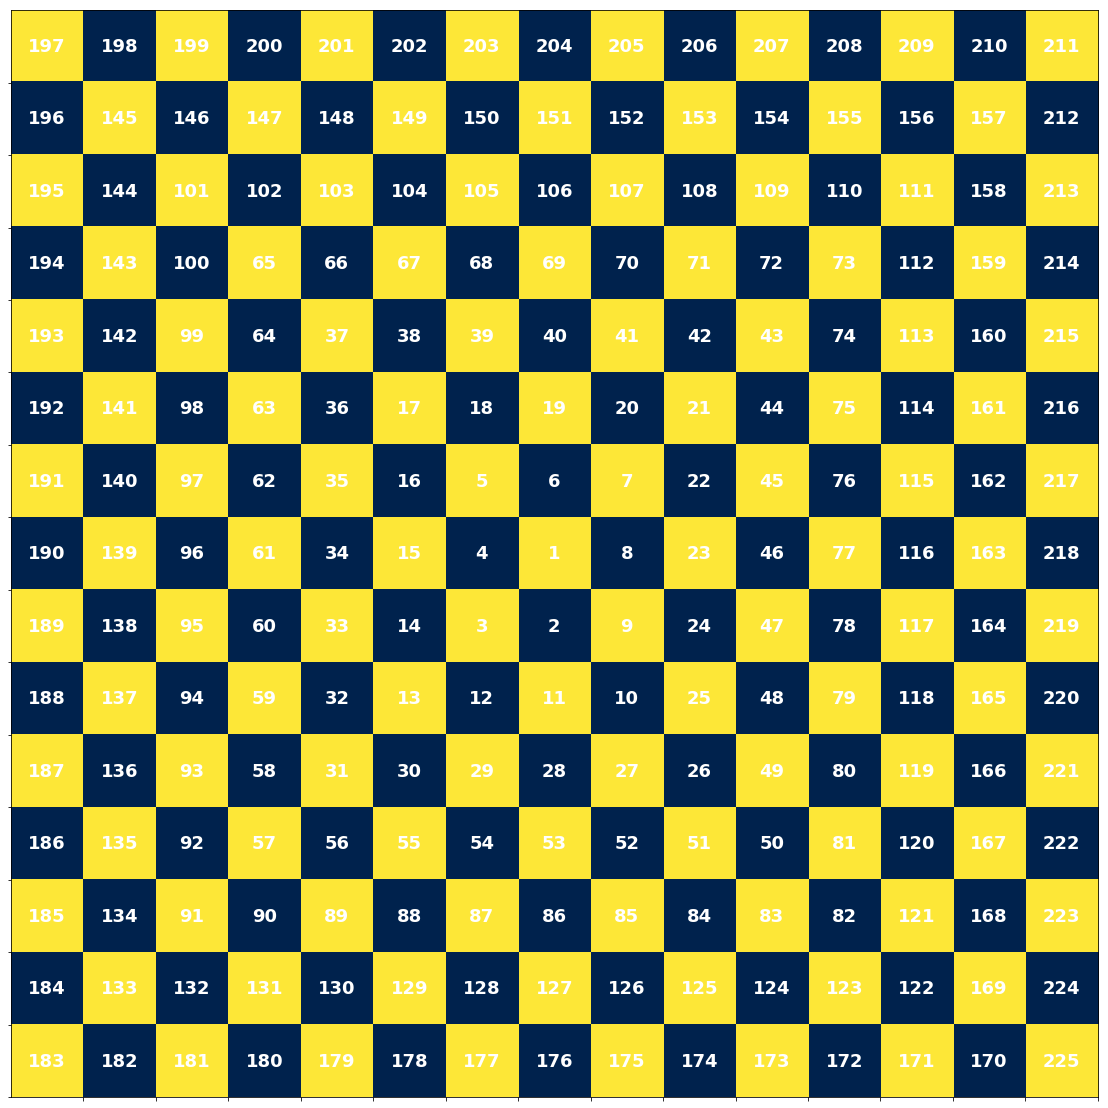

<Figure size 1440x1440 with 0 Axes>

In [1272]:
# Taken from https://codereview.stackexchange.com/questions/11317/prime-factorization-of-a-number
def prime_factorize(n):
    factors = []
    number = math.fabs(n)

    while number > 1:
        factor = get_next_prime_factor(number)
        factors.append(factor)
        number /= factor

    if n < -1: # If we'd check for < 0, -1 would give us trouble
        factors[0] = -factors[0]

    return tuple(factors)

def get_next_prime_factor(n):
    if n % 2 == 0:
        return 2

    # Not 'good' [also] checking non-prime numbers I guess?
    # But the alternative, creating a list of prime numbers,
    # wouldn't it be more demanding? Process of creating it.
    for x in range(3, int(math.ceil(math.sqrt(n)) + 1), 2):
        if n % x == 0:
            return x

    return int(n)


def draw_spiral_primes(size, path):
    _, ax = plt.subplots(figsize=(20,20))
    m = spiral(size)
    min_val, max_val = 0, size * 2 + 1
    ax.set_yticks(arange(size*2+1)+0.5)
    ax.set_xticks(arange(size*2+1)+0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    

    if path == None:
        for x in range(size * 2 + 1):
            for y in range(size*2 + 1):
                c = int(m[x][y])
                m[x][y] = m[x][y]%2
                ax.text(y, x, str(c), va='center', ha='center', fontsize=18, color = 'w', weight='bold')
        ax.imshow(m, cmap=plt.get_cmap('cividis'))
    else:
        ax.imshow(m, cmap=plt.get_cmap('rainbow'), alpha=0.1)
        ax.grid(True, which='both',color='k')
        ax.axis('off')
        
    plt.figure(figsize=(20,20))
    
    if path:
        arrow_cmap = plt.get_cmap('rainbow')
        last_x = None
        last_y = None

        norm = plt.Normalize(0, len(path))

        i = 0
        
        for point,value in path:
            x = point[0]
            y = point[1]

            if last_x is not None:
                ax.arrow(last_x + size, 
                         size - last_y, 
                          (x - last_x),
                          (last_y - y), width = 0.2, head_width=0.5, head_length=0.5, 
                         fc=arrow_cmap(norm(i)), ec=arrow_cmap(norm(i)))
            last_x = x
            last_y = y
            i += 1
            
        oc = plt.Circle((size, size), 0.5, color='b')
        lc = plt.Circle((last_x + size, size - last_y), 0.5, color='r')
        ax.add_artist(oc)
        ax.add_artist(lc)

plt.show()
_,path = walk((1,2),start=(0,0))
draw_spiral_primes(7,None)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0


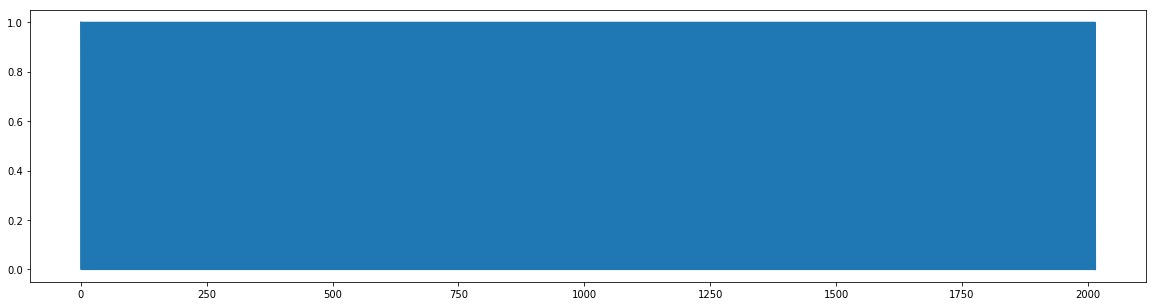

In [1265]:
positions = []
for pos,val in path:
    print(val%2)
    positions.append(val%2)

plt.figure(figsize=(20,5))
plt.plot(positions)

In [1294]:
def fib(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

lengths = []
for n,d in zip(list(fib(15))[4:],list(fib(15))[5:]):
    print((n,d))
    _,path = walk((n,d))
    lengths.append(len(path))


(3, 5)
(5, 8)
(8, 13)
(13, 21)
(21, 34)
(34, 55)
(55, 89)
(89, 144)
(144, 233)
(233, 377)


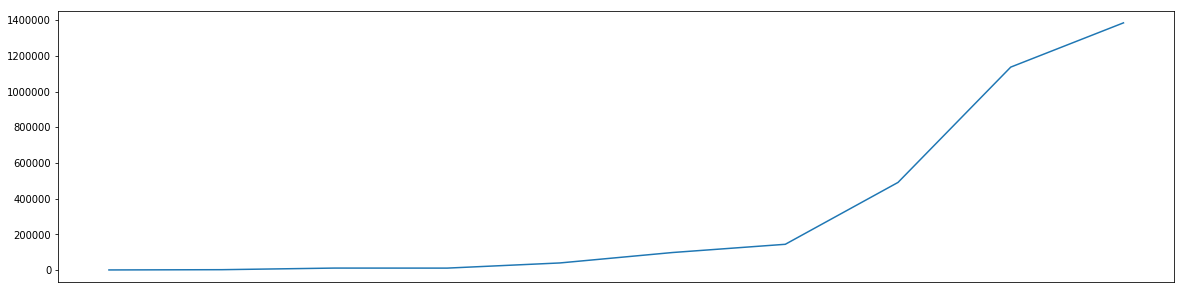

In [1299]:
plt.figure(figsize=(20,5))
plt.xticks([])
plt.plot(lengths)